In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (Assuming CSV files)
sales_data = pd.read_csv('Boxify Dataset - Data Analyst Bootcamp.csv')
#inventory_data = pd.read_csv('inventory_data.csv')
sales_data

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,6.827430e+05,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1.016014e+06,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,3.404640e+05,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,3.340110e+05,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1.287938e+06,121.95,2010,28,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,208023,Active,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,NaN,NaN,S,2,1,3.775266e+05,46.95,2001,23,27.42,37.89


In [11]:
# 1. Data Cleaning and Preprocessing
def preprocess_data(df):
    #df['Date'] = pd.to_datetime(df['ReleaseYear'])  # Ensure date is in the correct format
    df = df.dropna()  # Remove missing values
    df['Revenue'] = df['ItemCount'] * df['PriceReg']  # Calculate Revenue if not present
    return df

sales_data = preprocess_data(sales_data)
sales_data

C:\Users\user\AppData\Local\Temp\ipykernel_3976\2903089231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['ItemCount'] * df['PriceReg']  # Calculate Revenue if not present


,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,Revenue
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84,359.92
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54,967.59
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97,1564.00
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15,2000.00
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99,3414.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75991,85102,Historical,863599,0.0,0.0,S,2,1,119056.0,64.99,2008,34,32.49,53.00,2209.66
75992,85103,Historical,614304,0.0,0.0,S,6,1,1115312.0,21.50,2004,53,47.99,21.97,1139.50
75993,85104,Historical,109021,0.0,0.0,S,7,1,1315446.0,142.75,2006,19,47.99,53.99,2712.25
75994,85105,Historical,658242,0.0,0.0,S,2,1,877788.0,50.00,2012,21,27.07,32.62,1050.00


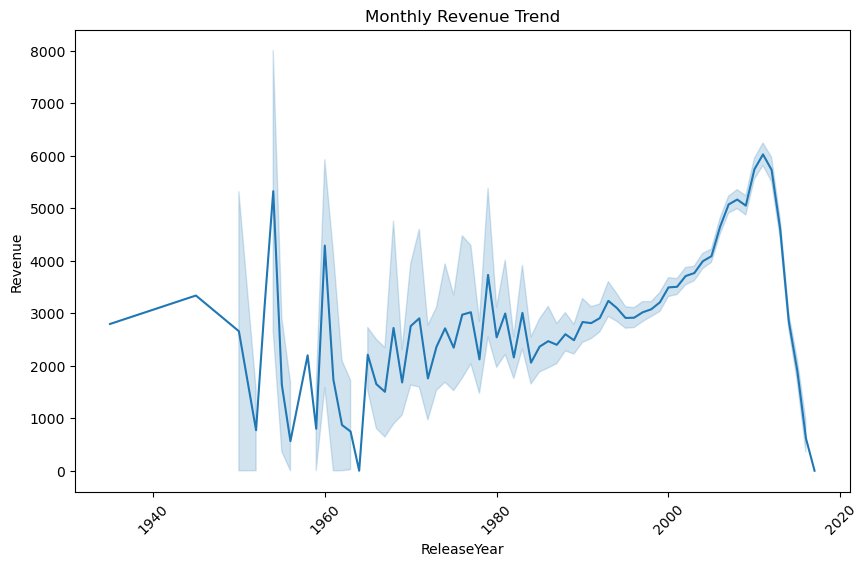

In [21]:
# 2. Sales Trends Analysis

# Group by date for daily/weekly/monthly revenue trend
#sales_trend = sales_data.groupby(sales_data['ReleaseYear'].agg({'Revenue': 'sum', 'ItemCount': 'sum'
                                                             

# Plot Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='ReleaseYear', y='Revenue',data=sales_data)
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()

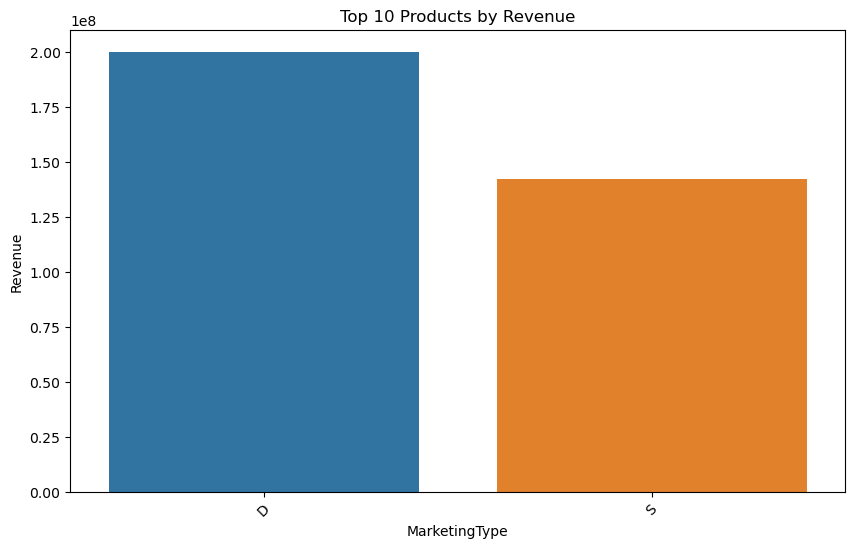

NameError: name 'inventory_data' is not defined

In [23]:




# 3. Top-selling Products
top_products = sales_data.groupby('MarketingType').agg({'Revenue': 'sum', 'ItemCount': 'sum'}).reset_index()
top_products = top_products.sort_values(by='Revenue', ascending=False)

# Plot Top-selling Products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products['MarketingType'].head(10), y=top_products['Revenue'].head(10))
plt.title("Top 10 Products by Revenue")
plt.xticks(rotation=45)
plt.show()
